In [1]:
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Star39552_balanced.csv')
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [4]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,16.050687,0.500000
std,1.308857,12.446291,0.788133,0.513987,2.443937,0.500006
min,-0.620000,-27.840000,0.420000,-0.400000,-0.350000,0.000000
25%,7.210000,2.430000,0.800000,0.358000,14.756514,0.000000
50%,8.160000,4.440000,0.990000,0.703000,16.020827,0.500000
75%,8.830000,8.232500,1.230000,1.129000,17.590542,1.000000
max,12.850000,772.330000,40.630000,3.440000,30.449015,1.000000


In [5]:
df.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

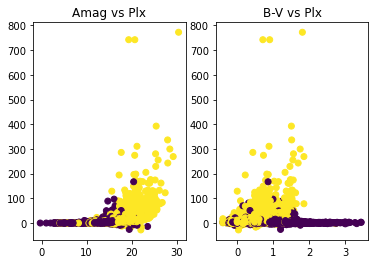

In [6]:
plt.subplot(1,2,1)
plt.title("Amag vs Plx")
plt.scatter(df['Amag'],df['Plx'],c = df.TargetClass)
plt.subplot(1,2,2)
plt.title("B-V vs Plx")
plt.scatter(df['B-V'],df['Plx'],c = df.TargetClass)

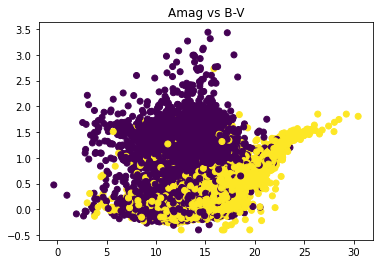

In [7]:
plt.title("Amag vs B-V")
plt.scatter(df['Amag'],df['B-V'],c = df.TargetClass)

C:\Users\Vidhyuth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

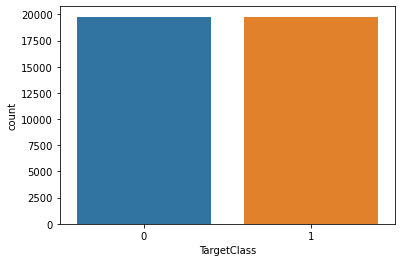

In [8]:
import seaborn
seaborn.countplot(df.TargetClass)

In [10]:
X=df[['Amag','B-V','Plx']]#.drop(columns=['e_Plx','SpType','TargetClass'])
Y=df['TargetClass']
print(X)
print(Y)

            Amag    B-V    Plx
0      22.502556  1.213  31.66
1      15.792525  1.130   3.21
2      18.797552  0.596  12.75
3      15.132508  1.189   5.23
4      13.431356  0.173   0.96
...          ...    ...    ...
39547   6.982245  0.474   0.17
39548  18.340790  0.424  18.12
39549  17.159748  0.227   3.89
39550  15.651898  1.467   2.13
39551  17.030317  0.480   3.82

[39552 rows x 3 columns]
0        1
1        0
2        1
3        0
4        1
        ..
39547    0
39548    1
39549    1
39550    0
39551    1
Name: TargetClass, Length: 39552, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25 , random_state=0)

'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

In [12]:
print(X_train)
print(Y_train)

            Amag    B-V    Plx
9347   18.247452  0.447  27.51
19908  12.831831  1.388   2.86
18205  14.634676 -0.077   2.46
5058   22.436012  1.197  32.30
21094  17.463577  0.230   8.03
...          ...    ...    ...
20757  15.258769  1.091   2.05
32103  15.624846  0.423   2.71
30403  15.713025  1.026   4.95
21243  15.191280  1.122   1.96
2732   17.554903  0.471   8.57

[29664 rows x 3 columns]
9347     1
19908    0
18205    1
5058     1
21094    0
        ..
20757    0
32103    1
30403    0
21243    0
2732     1
Name: TargetClass, Length: 29664, dtype: int64


In [13]:
print("Shape of train: ")
print(X_train.shape,Y_train.shape)
print("Shape of test: ")
print(X_test.shape,Y_test.shape)

Shape of train: 
(29664, 3) (29664,)
Shape of test: 
(9888, 3) (9888,)


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [15]:
y_predict=model.predict(X_test)
print(y_predict,np.array(Y_test))

[0 1 1 ... 1 0 0] [0 0 1 ... 1 0 0]


Confusion Matrix : 
 [[4168  698]
 [ 531 4491]]


<AxesSubplot:>

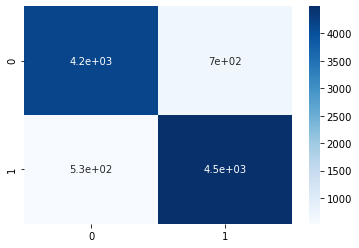

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)
print("Confusion Matrix : \n", cm)

import seaborn as sns
sns.heatmap(cm, annot=True,cmap='Blues')

In [17]:
from sklearn.metrics import accuracy_score
score=round(accuracy_score(Y_test, y_predict)*100,3)
print("Accuracy : ", accuracy_score(Y_test, y_predict))
print("Accuracy is ",score,"%")

Accuracy :  0.875707928802589
Accuracy is  87.571 %
